# Name : Asad ullah
# Batch : DS2312


The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

**What is Dystopia?**
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

**What are the residuals?**
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

**What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?**
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv('happiness_score_dataset.csv')

In [61]:
df.head(15)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [62]:
df.tail(15)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
143,Niger,Sub-Saharan Africa,144,3.845,0.03602,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195
145,Tanzania,Sub-Saharan Africa,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079
146,Madagascar,Sub-Saharan Africa,147,3.681,0.03633,0.20824,0.66801,0.46721,0.19184,0.08124,0.21333,1.85100
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


# EDA

In [63]:
df.shape

(158, 12)

In [64]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [65]:
df.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [66]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

<Axes: >

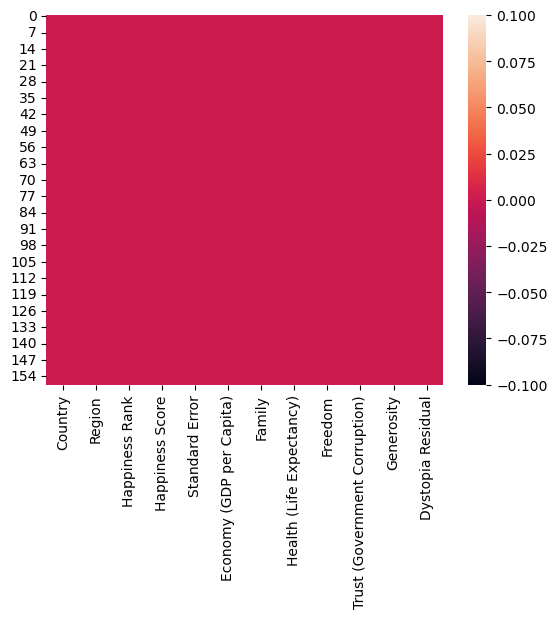

In [68]:
sns.heatmap(df.isnull())

In [69]:
for i in df:
    print(df[i].value_counts())
    print("\n")
    

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64


Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


Happiness Rank
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: count, Length: 157, dtype: int64


Happiness Score
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: count, Length: 157, dtype: int64


Standard Error
0

In [70]:
newdf= df.drop('Country', axis=1)
newdf

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [71]:
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in newdf.columns:
    if newdf[i].dtypes=='object':
        newdf[i]= OE.fit_transform(newdf[i].values.reshape(-1,1))
newdf

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


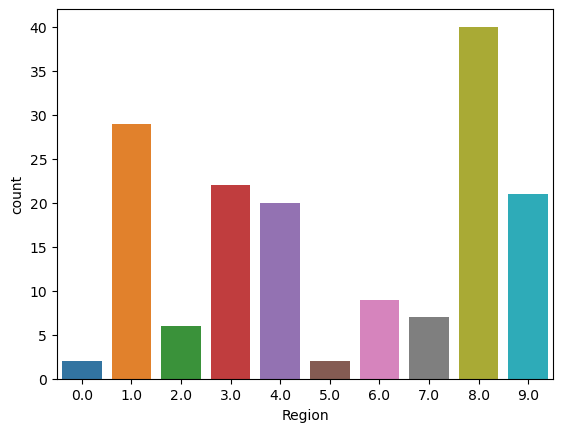

In [72]:
sns.countplot(x='Region',data=newdf)
plt.show()

**BiVariate Analysis**

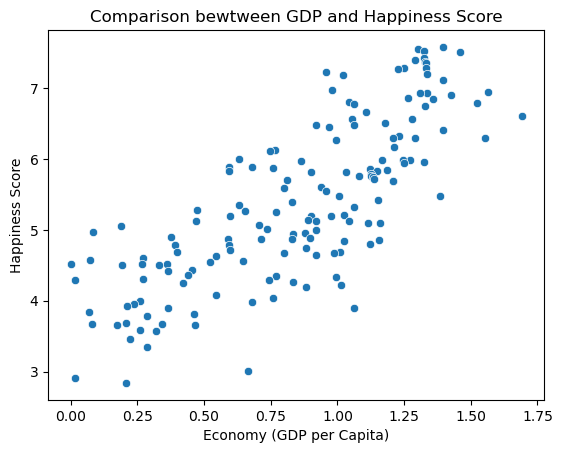

In [73]:
plt.title("Comparison bewtween GDP and Happiness Score")
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data = newdf)
plt.show()

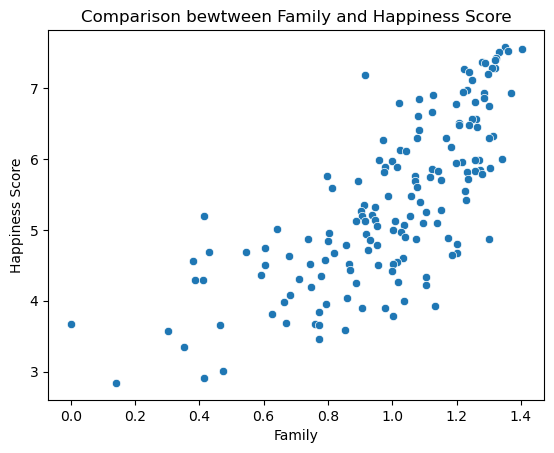

In [74]:
plt.title("Comparison bewtween Family and Happiness Score")
sns.scatterplot(x='Family', y='Happiness Score', data = newdf)
plt.show()

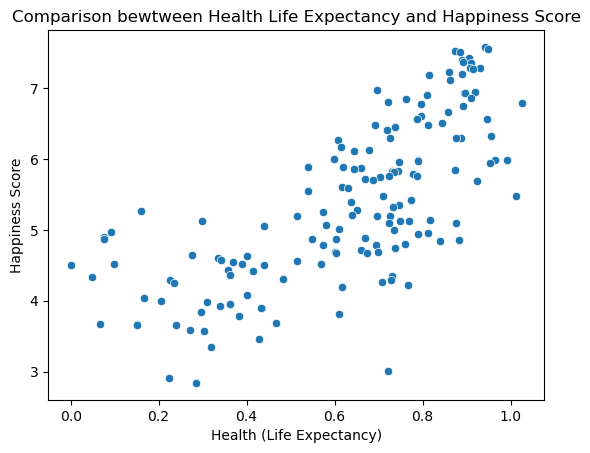

In [75]:
plt.title("Comparison bewtween Health Life Expectancy and Happiness Score")
sns.scatterplot(x='Health (Life Expectancy)', y='Happiness Score', data = newdf)
plt.show()

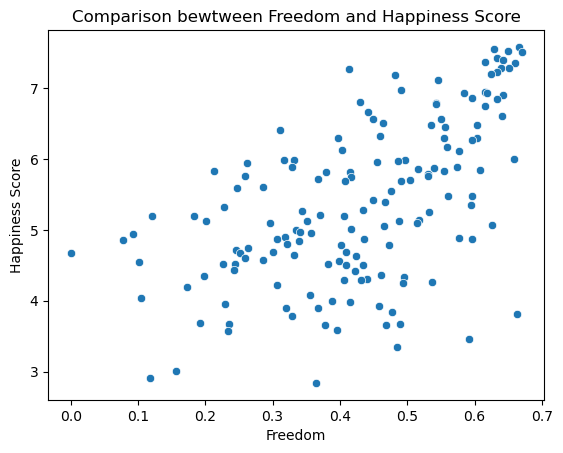

In [76]:
plt.title("Comparison bewtween Freedom and Happiness Score")
sns.scatterplot(x='Freedom', y='Happiness Score', data = newdf)
plt.show()

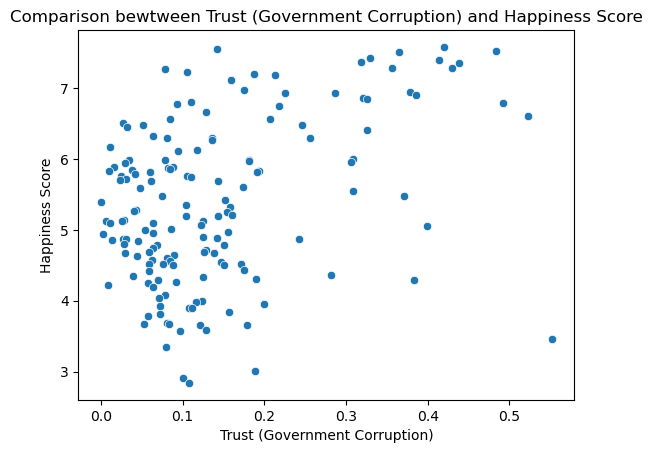

In [77]:
plt.title("Comparison bewtween Trust (Government Corruption) and Happiness Score")
sns.scatterplot(x='Trust (Government Corruption)', y='Happiness Score', data = newdf)
plt.show()

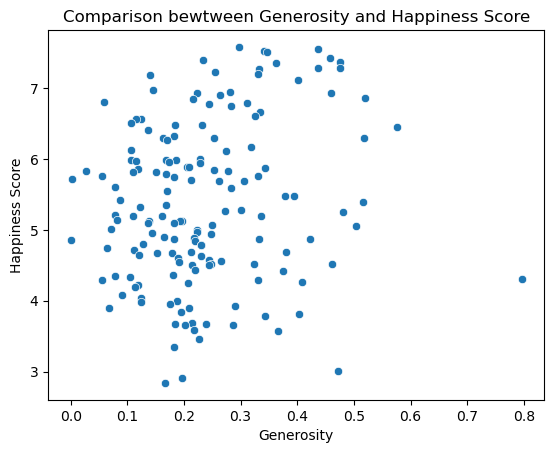

In [78]:
plt.title("Comparison bewtween Generosity and Happiness Score")
sns.scatterplot(x='Generosity', y='Happiness Score', data = newdf)
plt.show()

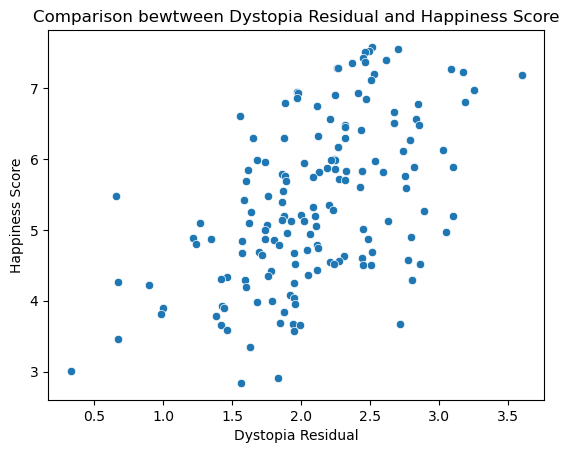

In [79]:
plt.title("Comparison bewtween Dystopia Residual and Happiness Score")
sns.scatterplot(x='Dystopia Residual', y='Happiness Score', data = newdf)
plt.show()

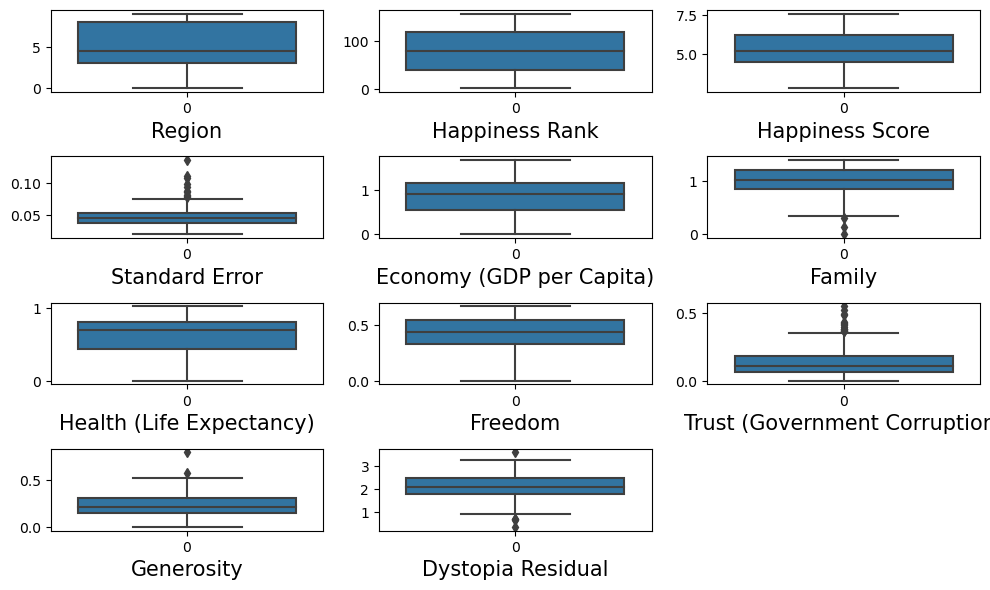

In [80]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in newdf.columns:
    if plotnumber<=11:
        ax= plt.subplot(4,3, plotnumber)
        sns.boxplot(newdf[col])
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

As we see there are not much outliers in data let's proceed further

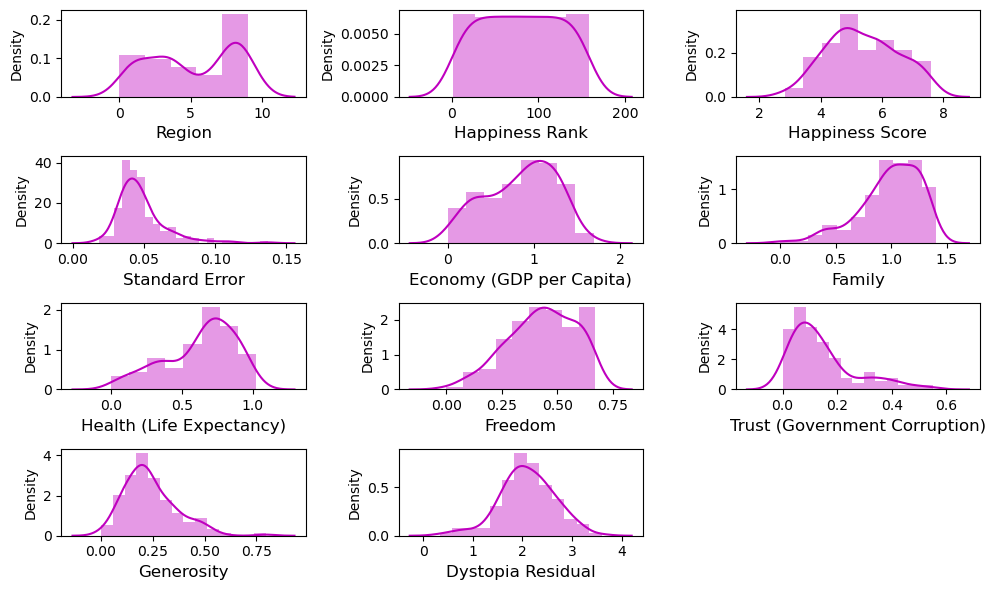

In [82]:
#Let's check how data has been distributed in remaining columns
plt.figure(figsize=(10,6), facecolor='white')
plotnumber=1
for col in newdf:
    if plotnumber<=11:
        ax= plt.subplot(4,3, plotnumber)
        sns.distplot(newdf[col], color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

There is skewness in some columns

In [84]:
Skewed_column = newdf['Standard Error']

# Apply a logarithmic transformation to the skewed column
transformed_column = np.log(Skewed_column)

# Update the original column with the transformed values
newdf['Standard Error'] = transformed_column

In [90]:
newdf.corr()
   

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,0.213773,-0.176791,-0.062697,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,0.213773,1.000000,-0.992105,0.190675,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.176791,-0.992105,1.000000,-0.210296,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.062697,0.190675,-0.210296,1.000000,-0.223477,-0.133812,-0.320471,-0.171718,-0.187226,-0.124805,0.052531
Economy (GDP per Capita),-0.260139,-0.785267,0.780966,-0.223477,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.168533,-0.733644,0.740605,-0.133812,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.357508,-0.735613,0.724200,-0.320471,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.092567,-0.556886,0.568211,-0.171718,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.165040,-0.372315,0.395199,-0.187226,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.273557,-0.160142,0.180319,-0.124805,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301


<Axes: >

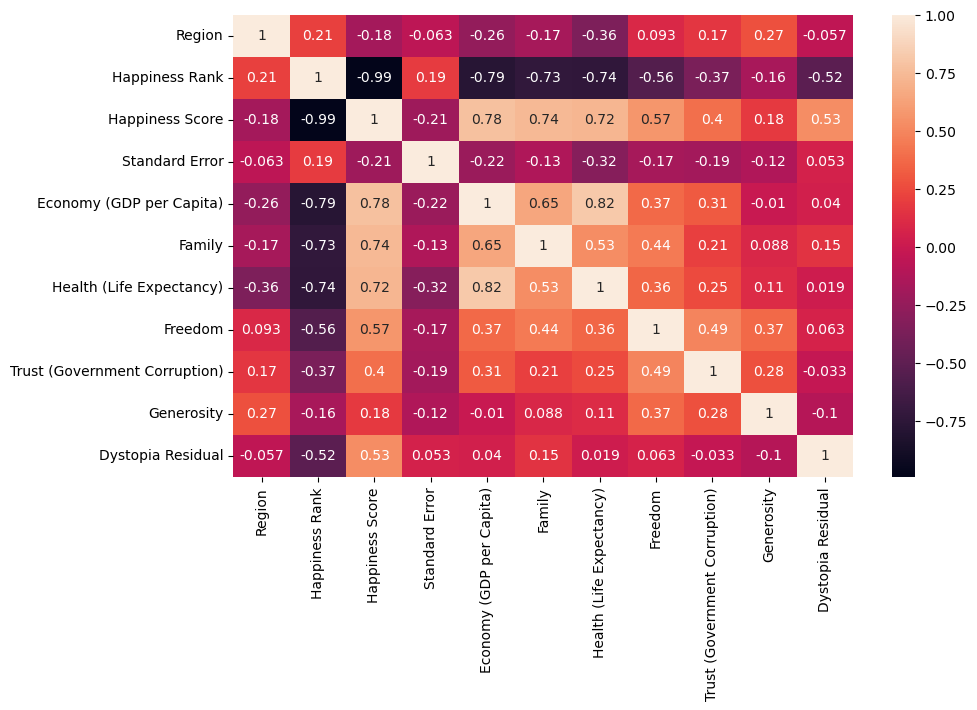

In [93]:
plt.figure(figsize=(10,6), facecolor='white')
sns.heatmap(newdf.corr(), annot=True)

There is Multicolinearuty

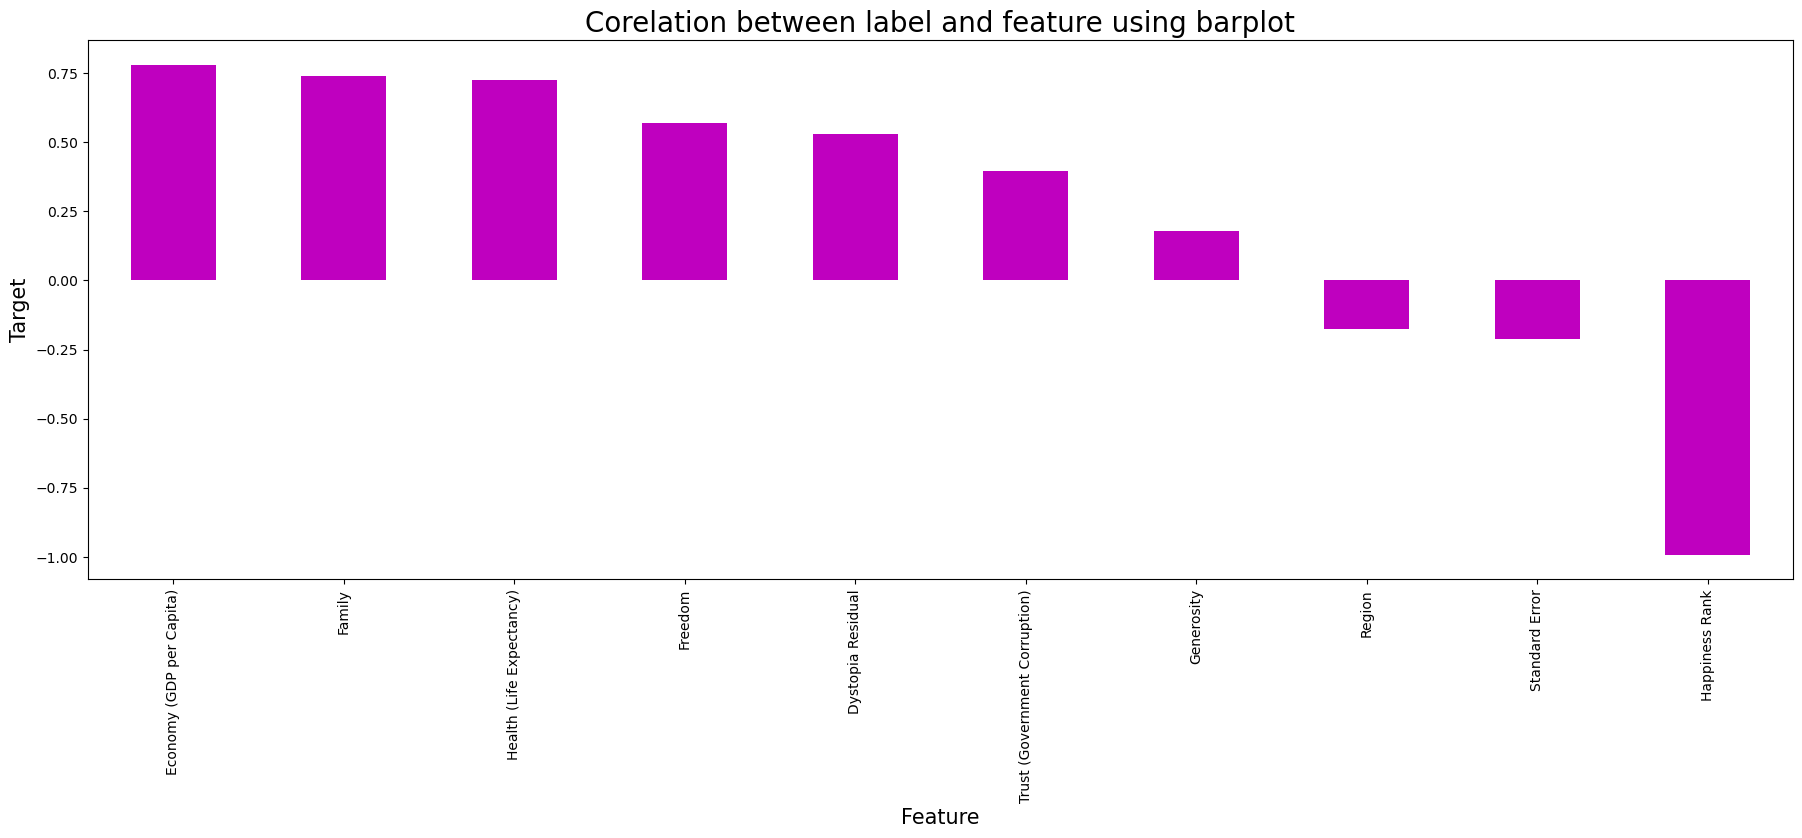

In [95]:
plt.figure(figsize=(22,7))
newdf.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar', color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title("Corelation between label and feature using barplot", fontsize=20)
plt.show()

**Separating label and Feature**

In [133]:
x= newdf.drop("Happiness Score", axis=1)
y= df["Happiness Score"]

**Feature caling using Standard Scalarization**

In [134]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns= x.columns)
x

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.300256,-1.721000,-0.915376,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.300256,-1.699075,0.229364,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857
2,1.300256,-1.677149,-0.993935,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.300256,-1.655224,-0.504531,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,-0.040302,-1.633299,-0.785305,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...
153,0.965117,1.633576,-0.866206,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925
154,0.965117,1.655501,-0.694170,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967
155,-0.375441,1.677427,0.313775,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430
156,0.965117,1.699352,2.055159,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985


**Checking Variance Inflation VIF**

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.469054,Region
1,74.357182,Happiness Rank
2,1.207867,Standard Error
3,13.185422,Economy (GDP per Capita)
4,5.619212,Family
5,8.050892,Health (Life Expectancy)
6,3.212189,Freedom
7,2.029664,Trust (Government Corruption)
8,2.125960,Generosity
9,17.638023,Dystopia Residual


As we see Happiness Rank is very high value let's drop that 


In [136]:
x=x.drop("Happiness Rank", axis=1)

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.414391,Region
1,1.179733,Standard Error
2,4.146539,Economy (GDP per Capita)
3,1.951233,Family
4,3.851531,Health (Life Expectancy)
5,1.760810,Freedom
6,1.460279,Trust (Government Corruption)
7,1.383959,Generosity
8,1.051692,Dystopia Residual


# Model Building

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


In [139]:
#Finding the best Random State
MaxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=i)
    lr= LinearRegression()
    lr.fit(x_train, y_train)
    pred= lr.predict(x_test)
    acc= r2_score(y_test, pred)
    if acc>MaxAccu:
        MaxAccu= acc
        maxRs=i
print("Maximum r2 score is ", MaxAccu, "On random state", maxRs)

Maximum r2 score is  0.9999999661132448 On random state 148


In [140]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=maxRs)

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge


In [142]:
lr= LinearRegression()
lr.fit(x_train, y_train)
pred_lr= lr.predict(x_test)
pred_train= lr.predict(x_train)
print('R2_score', r2_score(y_test, pred_lr))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_lr))
print('Mean Squared Error', mean_squared_error(y_test, pred_lr))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_lr)))

R2_score 0.9999999661132448
R2_score on training 99.99999248180941
Mean Absolute Error 0.00021358925663812292
Mean Squared Error 6.10796122227899e-08
Root mean Squared Error 0.000247142898386318


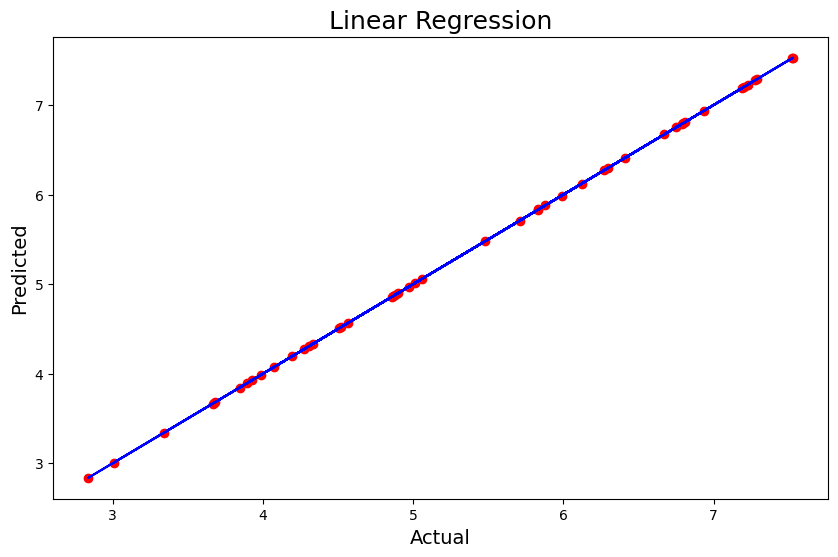

In [143]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_lr, y=y_test, color='r')
plt.plot(pred_lr, pred_lr, color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title("Linear Regression", fontsize=18)
plt.show()

In [144]:
rf= RandomForestRegressor()
rf.fit(x_train, y_train)
pred_rf= rf.predict(x_test)
pred_train= rf.predict(x_train)
print('R2_score', r2_score(y_test, pred_rf))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_rf))
print('Mean Squared Error', mean_squared_error(y_test, pred_rf))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_rf)))

R2_score 0.8571965576113842
R2_score on training 98.70738052141455
Mean Absolute Error 0.396774791666667
Mean Squared Error 0.2573978785354169
Root mean Squared Error 0.5073439450071489


In [145]:
knn= KNN()
knn.fit(x_train, y_train)
pred_knn= knn.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score', r2_score(y_test, pred_knn))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error', mean_squared_error(y_test, pred_knn))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score 0.8926730528084705
R2_score on training 90.27400283922884
Mean Absolute Error 0.34800416666666667
Mean Squared Error 0.19345281916666668
Root mean Squared Error 0.4398327172535789


In [146]:
dt= DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred_dt= dt.predict(x_test)
pred_train= dt.predict(x_train)
print('R2_score', r2_score(y_test, pred_dt))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_dt))
print('Mean Squared Error', mean_squared_error(y_test, pred_dt))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_dt)))

R2_score 0.8127333533319492
R2_score on training 100.0
Mean Absolute Error 0.4381875
Mean Squared Error 0.33754114583333344
Root mean Squared Error 0.5809829135468043


In [147]:
gb= GradientBoostingRegressor()
gb.fit(x_train, y_train)
pred_gb= gb.predict(x_test)
pred_train= gb.predict(x_train)
print('R2_score', r2_score(y_test, pred_gb))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_gb))
print('Mean Squared Error', mean_squared_error(y_test, pred_gb))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_gb)))

R2_score 0.916907189028114
R2_score on training 99.94925233373294
Mean Absolute Error 0.29713920092885077
Mean Squared Error 0.14977169253038192
Root mean Squared Error 0.3870034787057888


In [177]:
er= ExtraTreeRegressor()
er.fit(x_train, y_train)
pred_er= er.predict(x_test)
pred_train= gb.predict(x_train)
print('R2_score', r2_score(y_test, pred_er))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_er))
print('Mean Squared Error', mean_squared_error(y_test, pred_er))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_er)))

R2_score 0.7944819816717659
R2_score on training 99.94925233373294
Mean Absolute Error 0.4843125
Mean Squared Error 0.37043856249999996
Root mean Squared Error 0.6086366424230469


In [149]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train, y_train)
pred_svr=svr.predict(x_test)
pred_train= gb.predict(x_train)
print('R2_score', r2_score(y_test, pred_svr))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error', mean_squared_error(y_test, pred_svr))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_svr)))


R2_score 0.895208939079411
R2_score on training 99.94925233373294
Mean Absolute Error 0.282189203824412
Mean Squared Error 0.18888197874833235
Root mean Squared Error 0.4346055438536563


In [150]:
rr= Ridge()
rr.fit(x_train, y_train)
pred_rr=rr.predict(x_test)
pred_train= gb.predict(x_train)
print('R2_score', r2_score(y_test, pred_rr))
print('R2_score on training', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error', mean_absolute_error(y_test, pred_rr))
print('Mean Squared Error', mean_squared_error(y_test, pred_rr))
print('Root mean Squared Error', np.sqrt(mean_squared_error(y_test, pred_rr)))

R2_score 0.9999574691260096
R2_score on training 99.94925233373294
Mean Absolute Error 0.007439069491038165
Mean Squared Error 7.666031402526207e-05
Root mean Squared Error 0.00875558758880648


# Cross Validation

In [151]:
from sklearn.model_selection import cross_val_score

In [162]:
score= cross_val_score(knn,x,y, cv=5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_knn)-score.mean()))

[-9.3922861  -2.30541044 -2.93597944 -6.91067342 -4.7932114 ]
-5.2675121581880155
Difference between R2 score and cross validation score is  6.160185210996486


In [155]:
score1= cross_val_score(lr,x,y, cv=5, scoring = 'r2')
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_lr)-score.mean()))

[0.99999947 0.99999843 0.99999823 0.99999552 0.99999937]
0.9999982060377753
Difference between R2 score and cross validation score is  6.267512124301261


In [156]:
score2= cross_val_score(rf,x,y, cv=5, scoring = 'r2')
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_rf)-score.mean()))

[-7.25436407 -1.10657967 -1.14987519 -1.61379083 -5.48522527]
-3.321967006986666
Difference between R2 score and cross validation score is  6.1247087157994


In [157]:
score3= cross_val_score(dt,x,y, cv=5, scoring = 'r2')
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_dt)-score.mean()))

[ -5.55363888  -7.87064977  -6.41260213 -10.29550301  -5.82948594]
-7.192375945265236
Difference between R2 score and cross validation score is  6.080245511519965


In [158]:
score4= cross_val_score(gb,x,y, cv=5, scoring = 'r2')
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_gb)-score.mean()))

[-3.92242    -0.83467058 -2.43641456 -1.961837   -3.86806595]
-2.604681619121898
Difference between R2 score and cross validation score is  6.18441934721613


In [159]:
score5= cross_val_score(er,x,y, cv=5, scoring = 'r2')
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_er)-score.mean()))

[ -5.04055935 -12.02466648  -8.43957251 -15.2107418   -4.64803311]
-9.072714648215586
Difference between R2 score and cross validation score is  5.895855519384629


In [160]:
score6= cross_val_score(svr,x,y, cv=5, scoring = 'r2')
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_svr)-score.mean()))

[-11.89618854   0.29439628   0.80014126  -0.17766094  -5.82005068]
-3.359872523444075
Difference between R2 score and cross validation score is  6.1627210972674265


In [161]:
score7= cross_val_score(rr,x,y, cv=5, scoring = 'r2')
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is ', (r2_score(y_test,pred_rr)-score.mean()))

[0.99421679 0.99963425 0.9995547  0.99931717 0.99809246]
0.9981630766459864
Difference between R2 score and cross validation score is  6.267469627314025


# Hyper Paramter Tunning

In [163]:
from sklearn.model_selection import GridSearchCV

In [181]:
param_grid= {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    
}

In [182]:
gscv= GridSearchCV(er,param_grid,cv=5, scoring='neg_mean_squared_error')
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [183]:
gscv.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

In [184]:
Model = ExtraTreeRegressor(min_samples_leaf= 1, min_samples_split= 10)

# Saving model 

In [195]:
import joblib
joblib.dump(Model, "World Happiness")

['World Happiness']

In [196]:
import pickle
filename= 'WorldHappiness'
pickle.dump(Model, open(filename, 'wb'))